# Exploratory Data Analysis

### Roles to Explore:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\datasets--lukebarousse--data_jobs. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 785741/785741 [00:26<00:00, 29558.41 examples/s]


### Filter for US Data Analyst Roles

In [2]:
df_US_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

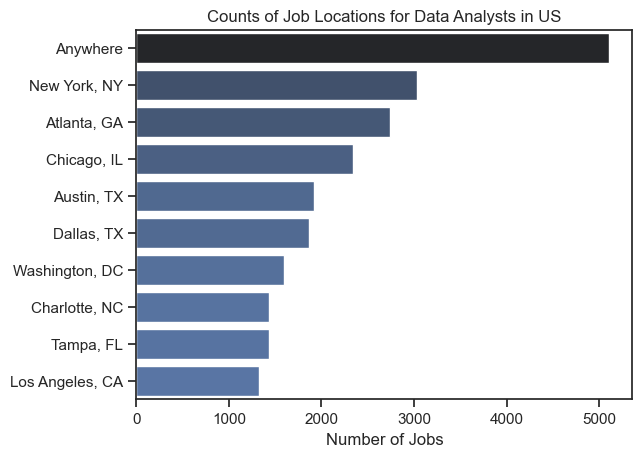

In [3]:
df_plot = df_US_DA['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Counts of Job Locations for Data Analysts in US')
plt.show()

In [4]:
dict_DA_US = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

In [5]:
df_US_DA[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
36,False,False,True
68,False,False,False
73,True,True,True
79,False,True,False
93,True,False,False
...,...,...,...
785603,False,False,False
785626,False,False,False
785685,False,True,False
785703,True,True,False


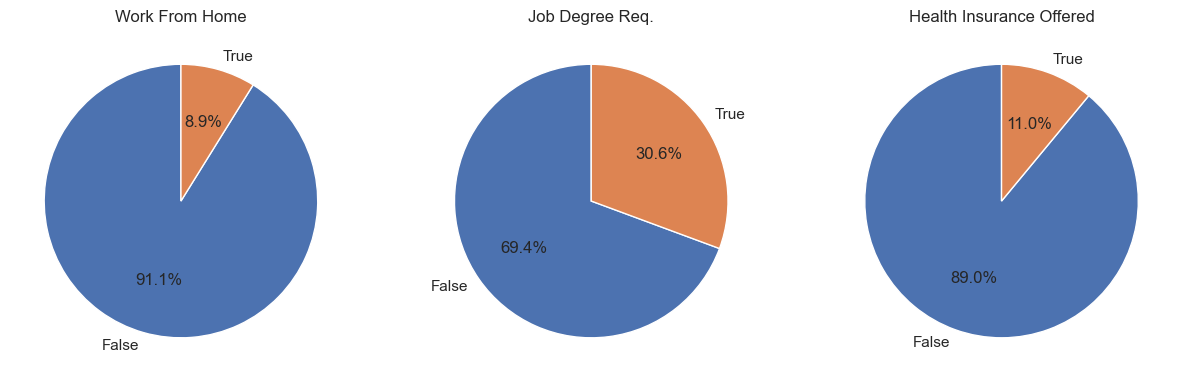

In [6]:
fig,ax = plt.subplots(1, 3, figsize=(15, 5))


for i, (col, title) in enumerate(dict_DA_US.items()):
    ax[i].pie(df[col].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

In [7]:
df_company = df_US_DA['company_name'].value_counts().head(10).to_frame()

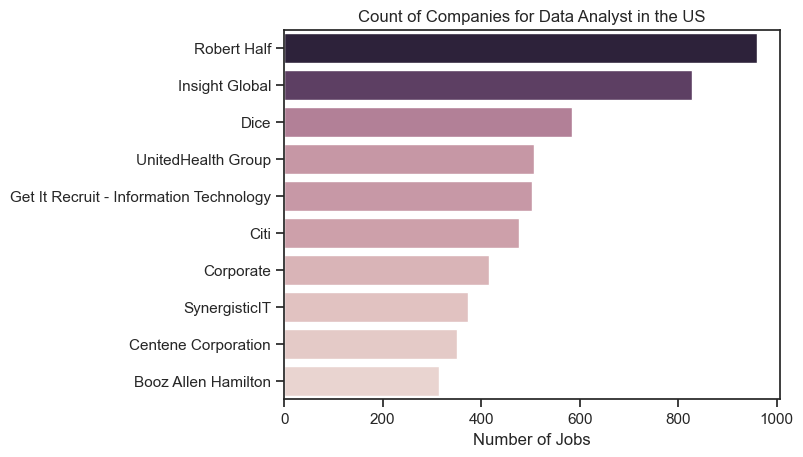

In [8]:
sns.set_theme(style='ticks')
sns.barplot(data=df_company, x='count', y=df_company.index, hue='count', legend=False)
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Count of Companies for Data Analyst in the US')
plt.show()